In [ ]:
# import necessary libraries
import os
import numpy as np
from PIL import Image
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
# mount Google Drive to access the face folder
drive.mount("/content/drive")
# specify the path to the folder containing face images
folder_path = "/content/drive/My Drive/Face_Folder"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


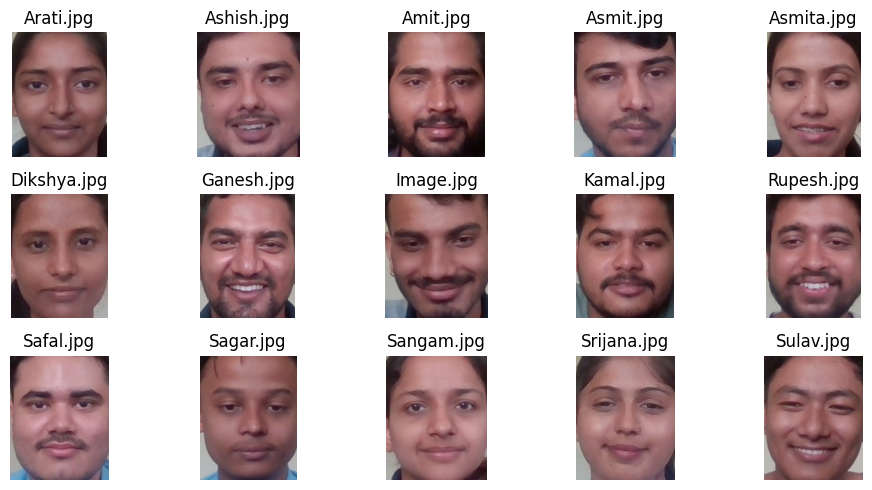

In [ ]:
# function to load images
def load_images(folder_path):
    image_list = []
    image_titles = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg'):
            img = Image.open(os.path.join(folder_path, filename))
            image_list.append(img)
            image_titles.append(filename)  # Store the title for display
    return image_list, image_titles

# function to process images
def process_images(image_list):
    processed_images = []
    for img in image_list:
        img_gray = img.convert('L')  # convert to grayscale
        img_resized = img_gray.resize((64, 64))  # resize to 64x64
        img_data = np.asarray(img_resized).flatten()  # flatten the image
        processed_images.append(img_data)
    return np.array(processed_images)

# function to display original images
def display_images(image_list, image_titles):
    num_images = len(image_list)
    columns = 5
    rows = (num_images // columns) + (num_images % columns > 0)
    plt.figure(figsize=(10, 5))
    for i, (img, title) in enumerate(zip(image_list, image_titles)):
        plt.subplot(rows, columns, i + 1)
        plt.imshow(img)
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# main function to load, process, and display images
def load_process_display_images(folder_path):
    image_list, image_titles = load_images(folder_path)  # load images
    processed_images = process_images(image_list)  # process images
    display_images(image_list, image_titles)  # display images
    return processed_images, image_titles

images, titles = load_process_display_images(folder_path)

In [ ]:
# normalize data
scaler = StandardScaler()
images_scaled = scaler.fit_transform(images)

In [ ]:
# apply PCA to decompose into eigenfaces
n_components = 5  # number of components (eigenfaces)
pca = PCA(n_components=n_components)
pca.fit(images_scaled)

PCA(n_components=5)

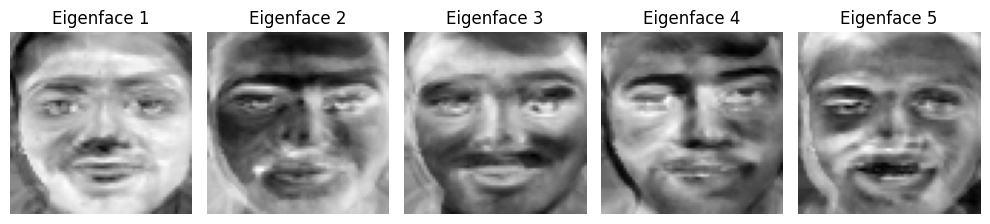

In [ ]:
# get the eigenfaces
eigenfaces = pca.components_.reshape((n_components, 64, 64))

# display eigenfaces
plt.figure(figsize=(10, 3))
for i in range(n_components):
    plt.subplot(1, n_components, i + 1)
    plt.imshow(eigenfaces[i], cmap='gray')
    plt.title(f'Eigenface {i + 1}')
    plt.axis('off')
plt.tight_layout()
plt.show()

Reconstructing my Face (Rupesh's Face)

In [ ]:
# obtain the weights for each image
weights = pca.transform(images_scaled)
# obtain the weights for Rupesh's face
rupesh_index = 9
rupesh_weights = weights[rupesh_index]

In [ ]:
# reconstructing the face using weights and eigenfaces
reconstructed_face = np.dot(rupesh_weights, pca.components_)
reconstructed_face = reconstructed_face.reshape(1, -1)
reconstructed_face = scaler.inverse_transform(reconstructed_face) # scaling back to match original scale
reconstructed_face_image = reconstructed_face.reshape(64, 64)

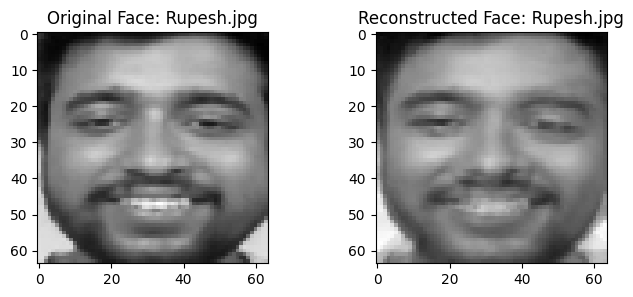

In [ ]:
# plot the original face and the reconstructed face of Rupesh
plt.figure(figsize=(8, 3))

# original face
plt.subplot(1, 2, 1)
plt.title(f"Original Face: {titles[rupesh_index]}")
plt.imshow(images[rupesh_index].reshape(64, 64), cmap='gray')

# reconstructed face
plt.subplot(1, 2, 2)
plt.title(f"Reconstructed Face: {titles[rupesh_index]}")
plt.imshow(reconstructed_face_image, cmap='gray')

plt.show()